In [1]:
#@author Shray Alag
#@version 08.05.2020
#@mentor Abhi
#@runtime running the whole notebook takes less than 10 seconds, but remember to input your choice of which motifs it
#should get the co-occurance of
#Finds the co-occurances of two motifs and runs statistics using the kmer sequences in a fasta file. Displays all
#of the meme motif sequences (in the sequence logo format) and the meme motifs information (e-value, etc.). Asks user
#which of thsoe two motifs they would like to get co-occurance of and then reads through the fasta file and uses a dict
#to store the information about the length difference between when the two motifs occur. Then, it creates histograms.
#The doExtraAnalysis feature allows analysis of negative and positive lengths (when the second motif occurs before the
#first).



#You need to install biopython (pip install biopython) and logomaker (pip install logomaker)


import matplotlib.pyplot as plt
from pandas import DataFrame
import logomaker as logo
from Bio.Seq import Seq
from Bio import SeqIO
import pandas as pd
import numpy as np
%matplotlib inline
import time
import re
import os




#TO USE CHANGE BASE_DIR and the other file directories.
BASE_DIR = "HT-SELEX/improved_html_SELEX_MEME_Results/ZNF134_AC40NTGTTAC_Lysate_BatchAATA_Cycle3_R1/"
fastaFile, memeTextFileName = BASE_DIR + "ZNF134_AC40NTGTTAC_Lysate_BatchAATA_Cycle3_R1.fa", BASE_DIR + "meme_out/meme.txt"




motifList = []
infoMotifList = []
firstMotifIndex, secondMotifIndex = -2, -2
firstMotifStr, secondMotifStr = "", ""
bothOccuranceLength = {}
doExtraAnalysis = True
global_time = time.time()

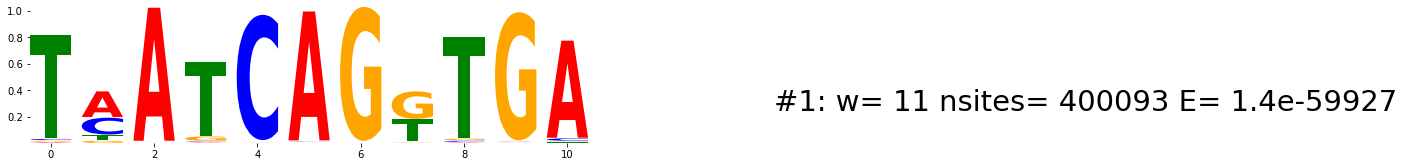

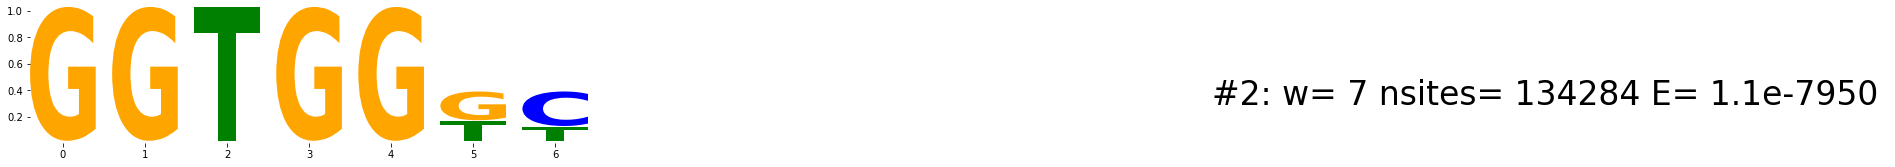

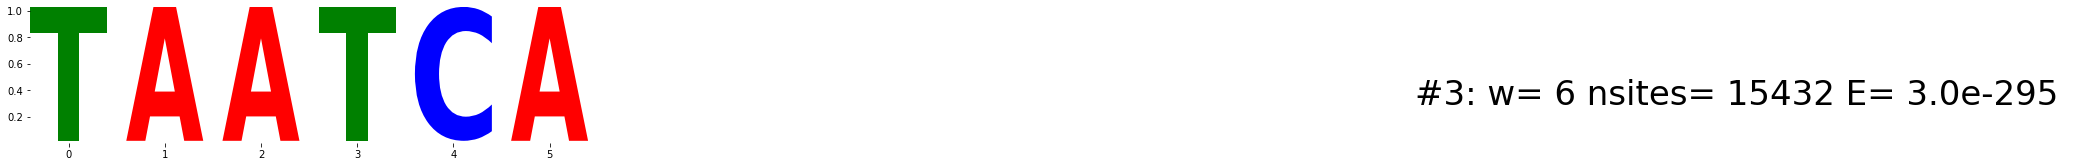

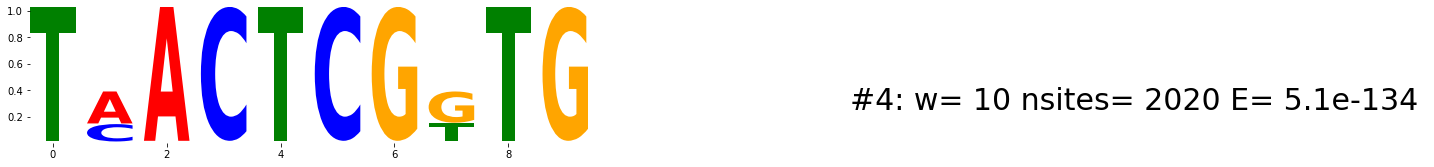

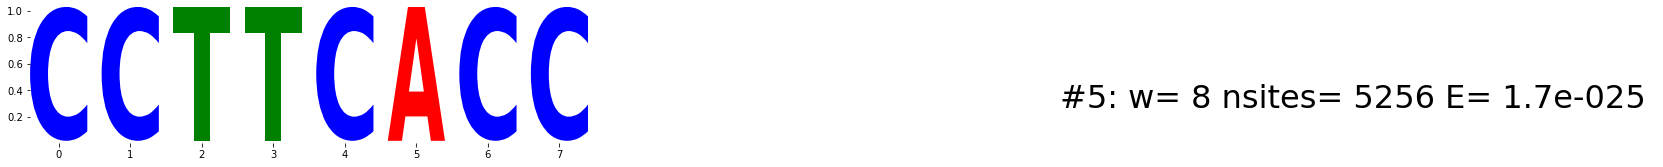

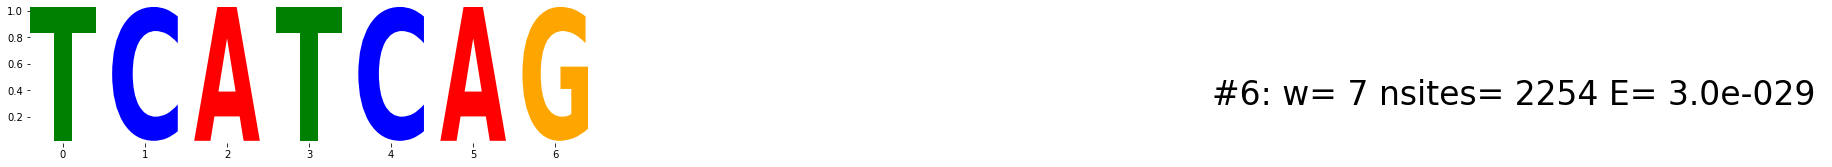

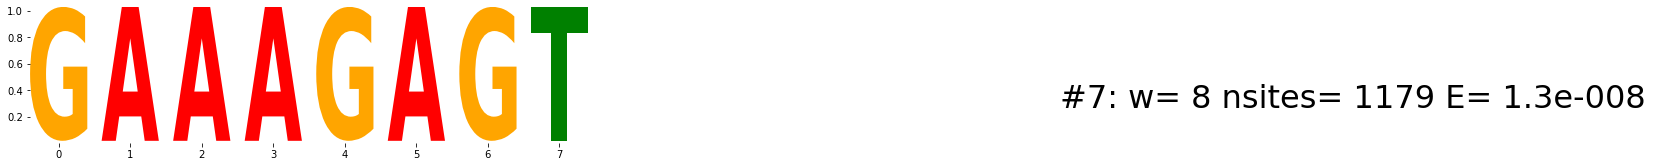

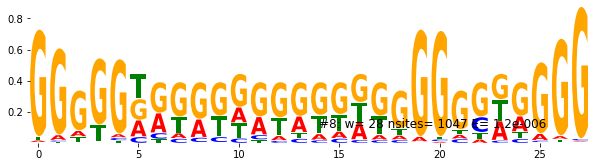

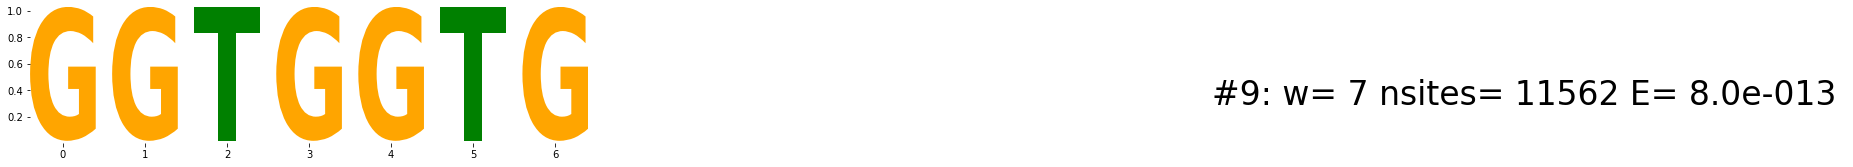

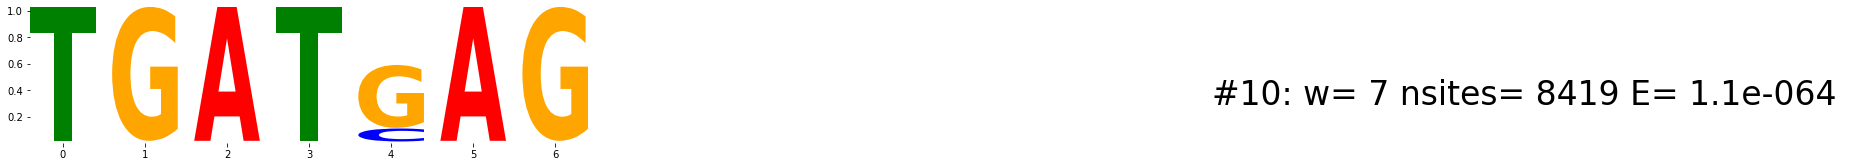

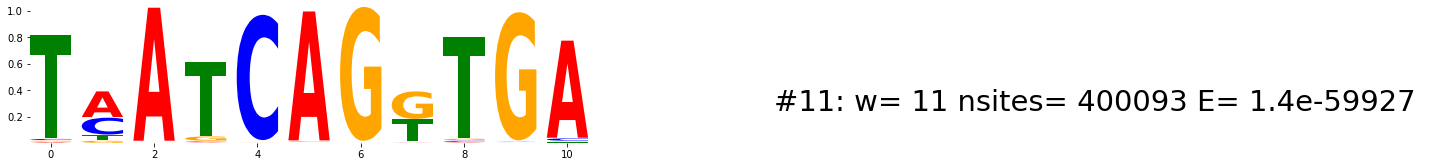

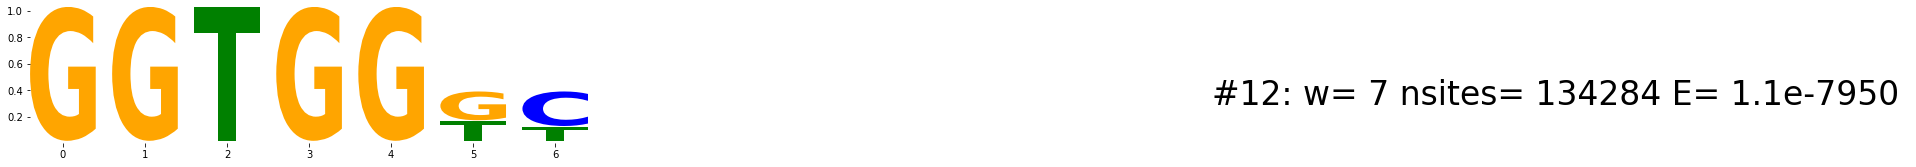

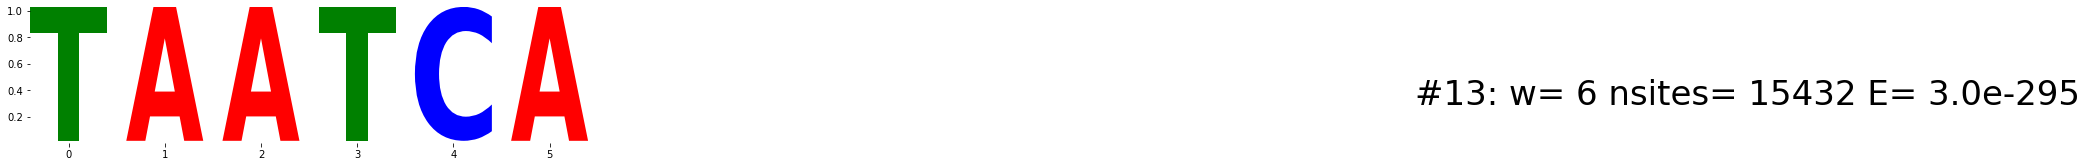

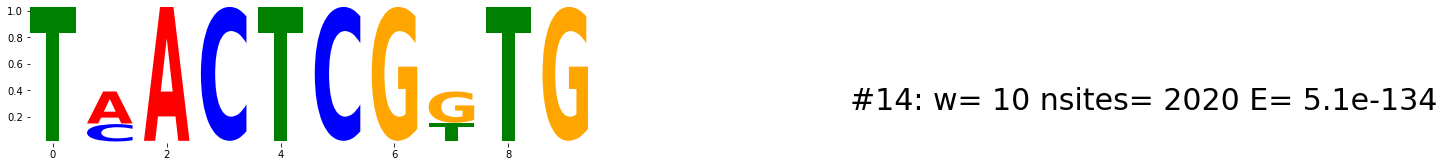

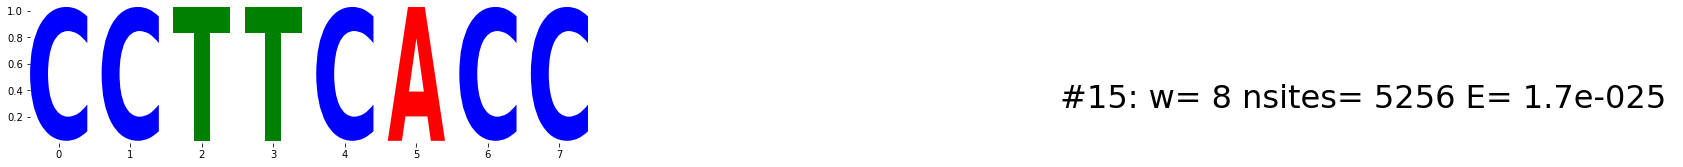

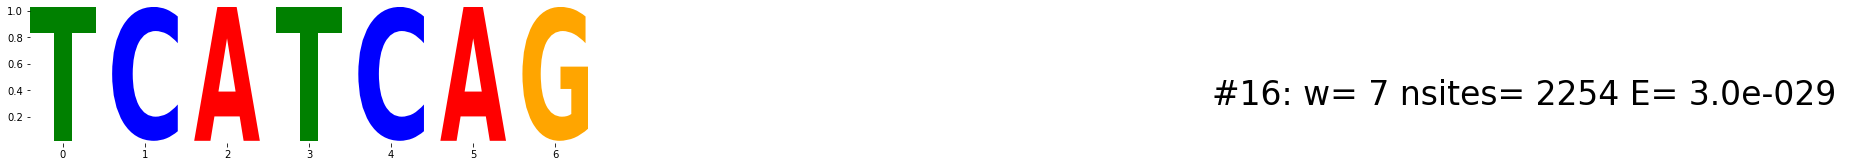

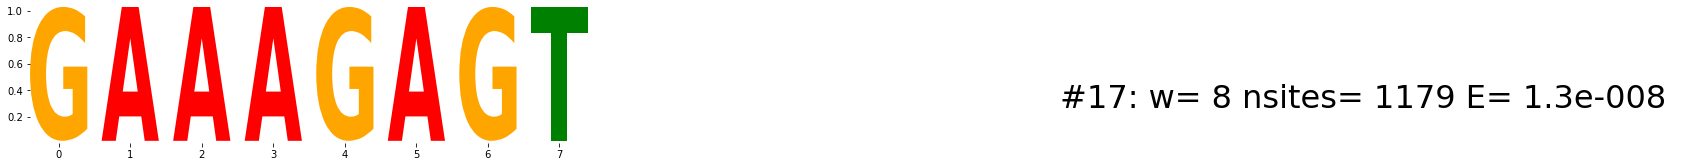

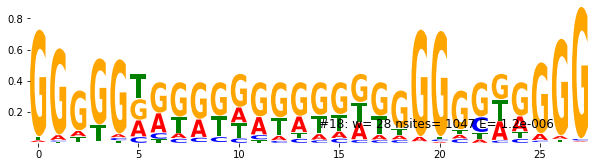

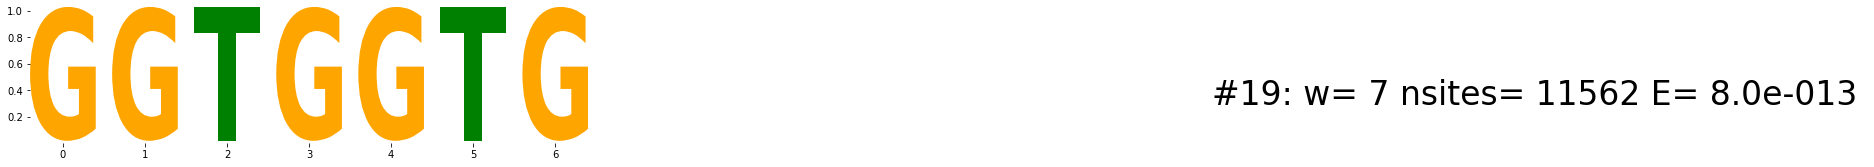

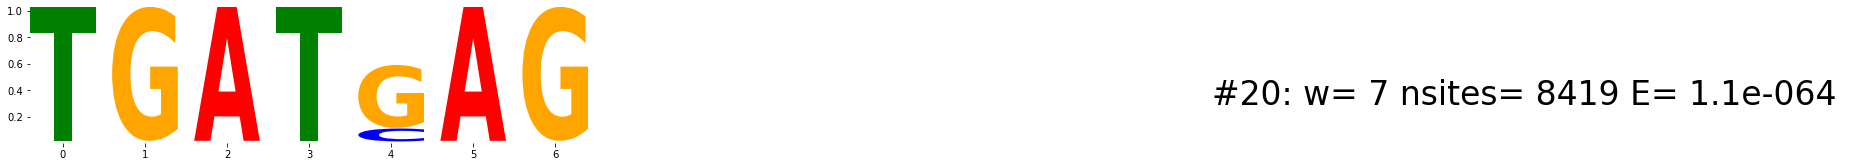

In [11]:
def setUp():
    readFasta(motifList)
    #print(motifList)
    displayLogos(motifList)
    firstMotifIndex, secondMotifIndex = -1, -1
    
    
    
    
    
def setUpParam(fastaFileTemp, memeTextFileNameTemp):
    fastaFile = fastaFileTemp
    memeTextFileName = memeTextFileNameTemp
    print(fastaFile, memeTextFileName)
    setUp()
    
    
    
    
    
    
def setUpParamWithIndexes(fastaFileTemp, memeTextFileNameTemp, firstMotifIndexTemp, secondMotifIndex):
    firstMotifIndex = firstMotifIndexTemp
    secondMotifIndex = secondMotifIndexTemp
    setUpParam(fastaFileTemp, memeTextFileNameTemp)
    
    
    
    
    
    
def readFasta(motifs):
    fastaReader = open(memeTextFileName, "r") 
    inMotif = False
    
    np_motif_array = []
    
    
    for row in fastaReader:
        if inMotif and not row.startswith("------"):
            #print(row.strip().split())
            np_motif_array.append(row.strip().split())
        if row.startswith("letter-probability"):
            inMotif = True
        elif inMotif and row.startswith("--------"):
            pd_Motif = pd.DataFrame(np_motif_array,
                columns=['A', 'C', 'G', 'T'])
            motifs.append(pd_Motif)
            np_motif_array = []
            inMotif = False
        
        if row.startswith("letter-probability matrix:"):
            infoMotifList.append(row[38:])
    motifList = motifs

    
    
    
    
    
def displayLogos(motifs):
    for i in range(len(motifs)):
        logo_logo = logo.Logo(getSpecialEncoding(motifs[i]), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)
        logo_logo.ax.text(14, 0, "#" + str(i+1) + ": " + infoMotifList[i], fontsize=40-len(motifs[i]))
    logo_logo.draw()
    
    
    
    
    
    
#takes in a 2D Pandas Dataframe
def getSpecialEncoding(motifs):
    rows = []
    for index, row in motifs.iterrows():
        rows.append((computationNeg(row["A"]), computationNeg(row["C"]), computationNeg(row["G"]), computationNeg(row["T"])))
    df = pd.DataFrame(rows, columns=['A', 'C', 'G', 'T'])
    return df
        
    
    
    
    
    
def computationNeg(coloumn):
    temp = float(coloumn)
    if temp < 0.15:
        return temp/3.75
    if temp > 0.8:
        return ((temp - 0.70)*12 + 0.2)/3.75
    else:
        return (temp + 0.2)/3.75
    
    
    
    
    
    
#takes in a 2D Pandas Dataframe
def getOneHot(motifs):
    rows = []
    for index, row in motifs.iterrows():
        rows.append((roundedVersion(row["A"]), roundedVersion(row["C"]), roundedVersion(row["G"]), roundedVersion(row["T"])))
    df = pd.DataFrame(rows, columns=['A', 'C', 'G', 'T'])
    return df
    
    
    
    
    
    
def roundedVersion(coloumn):
    if float(coloumn) > 0.8:
        return 1
    else:
        return 0
    


#There are many different methods for the setUp method. Depending on which parameters you know choose the appropriate 
#method
setUp()

In [12]:
firstMotifIndex = int(input("Please enter the number (1 to 10) of the first motif you would like to get the co-occurance of: ")) - 1
secondMotifIndex = int(input("Please enter the number (1 to 10) of the second motif you would like to get the co-occurance of: ")) - 1
print("Thanks! Running co-occurance statistics on motifs " + str(firstMotifIndex + 1) + " and " + str(secondMotifIndex + 1))    





def defineKeyMarkersForMotifs(firstMotifStr, secondMotifStr):
    
    
    for index, row in motifList[firstMotifIndex].iterrows():
        hasFoundOne = False
        for i in range(4):
            if float(row[i]) > 0.8:
                firstMotifStr = firstMotifStr + str((i + 1))
                hasFoundOne = True
            if i == 3 and hasFoundOne == False:
                firstMotifStr = firstMotifStr + "."
         
        
                
    for index, row in motifList[secondMotifIndex].iterrows():
        hasFoundOne = False
        for i in range(4):
            if float(row[i]) > 0.8:
                secondMotifStr = secondMotifStr + str((i + 1))
                hasFoundOne = True
            if i == 3 and hasFoundOne == False:
                secondMotifStr = secondMotifStr + "."
      
    
    
    firstMotifStr = firstMotifStr.replace('1','A')
    firstMotifStr = firstMotifStr.replace('2','C')
    firstMotifStr = firstMotifStr.replace('3','G')
    firstMotifStr = firstMotifStr.replace('4','T')
    
    secondMotifStr = secondMotifStr.replace('1','A')
    secondMotifStr = secondMotifStr.replace('2','C')
    secondMotifStr = secondMotifStr.replace('3','G')
    secondMotifStr = secondMotifStr.replace('4','T')
    
    
    
    
    print(firstMotifStr)
    print(secondMotifStr)
    return firstMotifStr, secondMotifStr
        
    
    
    
    
    

def readInFasta(firstMotifStr, secondMotifStr, bothOccuranceLength):
    twelveSequenceDict = {}
    negThirteenSequence = {}
    negThirteenSequenceFull = {}
    posThirteenSequence = {}
    counter = 0
    
    
    
    fasta_sequences = SeqIO.parse(open(fastaFile),'fasta')
    
    for fasta in fasta_sequences:
        counter = counter + 1
        name, sequence = fasta.id, str(fasta.seq)
        firstFound = re.search(firstMotifStr, sequence)
        secondFound = re.search(secondMotifStr, sequence)
        
        if not firstFound or not secondFound:
            sequence = str(Seq(sequence).reverse_complement())
            firstFound = re.search(firstMotifStr, sequence)
            secondFound = re.search(secondMotifStr, sequence)
        
        if firstFound and secondFound:
            
            length = firstFound.start() - secondFound.start()
            
            if length in bothOccuranceLength:
                bothOccuranceLength.update({length: (bothOccuranceLength.get(length) + 1)})       
            else:
                bothOccuranceLength.update({length: 1})
                
                
                
            if doExtraAnalysis:
                if length == 12:
#                     print(sequence[secondFound.start():firstFound.start()+len(firstMotifStr)])
                    if sequence[secondFound.start():firstFound.start()+len(firstMotifStr)] in twelveSequenceDict:
                        twelveSequenceDict.update({sequence[secondFound.start():firstFound.start()+len(firstMotifStr)]: (twelveSequenceDict.get(sequence[secondFound.start():firstFound.start()+len(firstMotifStr)]) + 1)})
                    
                    else:
                        twelveSequenceDict.update({sequence[secondFound.start():firstFound.start()+len(firstMotifStr)]: 1})
                
                if length == 13:
#                     print(sequence[secondFound.start():firstFound.start()+len(firstMotifStr)])
                    if sequence[secondFound.start():firstFound.start()+len(firstMotifStr)] in posThirteenSequence:
                        posThirteenSequence.update({sequence[secondFound.start():firstFound.start()+len(firstMotifStr)]: (posThirteenSequence.get(sequence[secondFound.start():firstFound.start()+len(firstMotifStr)]) + 1)})
                    
                    else:
                        posThirteenSequence.update({sequence[secondFound.start():firstFound.start()+len(firstMotifStr)]: 1})
                
                
                if length == -12:
#                     if counter < 10000:
#                         #print(sequence)
#                         print(sequence[firstFound.start():secondFound.start()+len(secondMotifStr)-2])
                    if sequence[firstFound.start():secondFound.start()+len(secondMotifStr)-2] in negThirteenSequence:
                        negThirteenSequence.update({sequence[firstFound.start():secondFound.start()+len(secondMotifStr)-2]: (negThirteenSequence.get(sequence[firstFound.start():secondFound.start()+len(secondMotifStr)-2]) + 1)})
                    
                    else:
                        negThirteenSequence.update({sequence[firstFound.start():secondFound.start()+len(secondMotifStr)-2]: 1})
                
                if length == -12:
#                     if counter < 10000:
#                         #print(sequence)
#                         print(sequence[firstFound.start():secondFound.start()+len(secondMotifStr)-2])
                    if sequence[firstFound.start()] in negThirteenSequenceFull:
                        negThirteenSequenceFull.update({sequence[firstFound.start():]: (negThirteenSequenceFull.get(sequence[firstFound.start():]) + 1)})
                    
                    else:
                        negThirteenSequenceFull.update({sequence[firstFound.start():]: 1})
    
    
    
    
    bothOccuranceLength = {k: v for k, v in sorted(bothOccuranceLength.items(), key=lambda item: item[1])}
    print(bothOccuranceLength)
    print(counter)

    
    
    
    if doExtraAnalysis:
        negThirteenSequence = {k: v for k, v in sorted(negThirteenSequence.items(), key=lambda item: item[1])}
        #print(negThirteenSequence)
        twelveSequenceDict = {k: v for k, v in sorted(twelveSequenceDict.items(), key=lambda item: item[1])}
        #print(twelveSequenceDict)
        posThirteenSequence = {k: v for k, v in sorted(posThirteenSequence.items(), key=lambda item: item[1])}
    return bothOccuranceLength, negThirteenSequence, twelveSequenceDict, posThirteenSequence, negThirteenSequenceFull





    
temp1, temp2 = defineKeyMarkersForMotifs(firstMotifStr, secondMotifStr)
bothOccuranceLength,negThirteenSequence,twelveSequenceDict, posThirteenSequence, negThirteenSequenceFull = readInFasta(temp1, temp2, bothOccuranceLength)

Please enter the number (1 to 10) of the first motif you would like to get the co-occurance of: 1
Please enter the number (1 to 10) of the second motif you would like to get the co-occurance of: 2
Thanks! Running co-occurance statistics on motifs 1 and 2
T.ATCAG.TGA
GGTGG..
{29: 60, -11: 104, -33: 128, 28: 128, 27: 176, -32: 236, -30: 268, -31: 320, 25: 362, -29: 364, 26: 388, -26: 484, -28: 488, -25: 488, -27: 518, -24: 578, 5: 630, -23: 640, -22: 640, -21: 650, -17: 656, -16: 744, -19: 764, -18: 766, -20: 798, 24: 832, -14: 898, 6: 900, 23: 1004, -15: 1186, 7: 1208, -13: 1610, 22: 1666, 8: 1888, 15: 2366, 14: 2410, 17: 2904, 16: 2934, 19: 4020, 18: 4134, 21: 4302, 9: 4402, 10: 4822, 20: 4838, 11: 5616, -12: 9568, 12: 11468, 13: 12390}
515895


<BarContainer object of 48 artists>

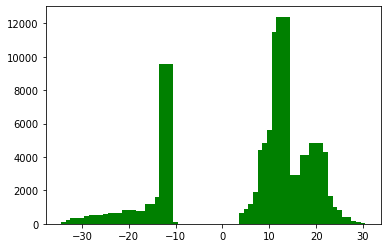

In [13]:
posLength = {}
negLength = {}



if doExtraAnalysis:
    for key in bothOccuranceLength:
        if int(key) > 0:
            posLength.update({key: bothOccuranceLength.get(key)})
        else:
            negLength.update({key: bothOccuranceLength.get(key)})
            
            
plt.bar(bothOccuranceLength.keys(), bothOccuranceLength.values(), 3, color='g')

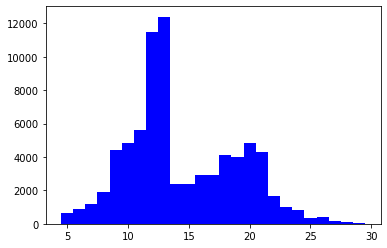

In [14]:
if doExtraAnalysis:
    plt.bar(posLength.keys(), posLength.values(), 1, color='b')

--- 110.69750332832336 seconds ---


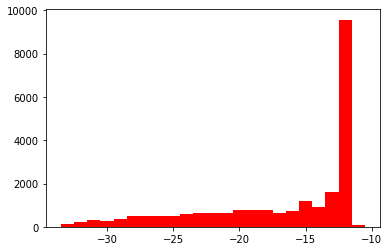

In [15]:
if doExtraAnalysis:
    plt.bar(negLength.keys(), negLength.values(), 1, color='r')
print("--- %s seconds ---" % (time.time() - global_time))

[[0.         0.         0.         1.        ]
 [0.5951087  0.23076923 0.04891304 0.12520903]
 [1.         0.         0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         1.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.00146321 0.         0.60618729 0.3923495 ]
 [0.         0.         0.         1.        ]
 [0.         0.         1.         0.        ]
 [1.         0.         0.         0.        ]
 [0.66325251 0.12123746 0.09531773 0.12019231]
 [0.         0.         1.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         1.         0.        ]]


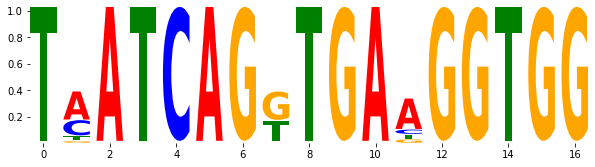

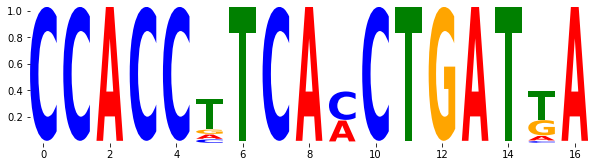

In [20]:
import random
from sklearn.preprocessing import normalize

def convert_to_one_hot(sequence, count):
    convert_dict = {'a':(float(count),0.0,0.0,0.0),
                   'c':(0.0,float(count),0.0,0.0),
                   'g':(0.0,0.0,float(count),0.0),
                   't':(0.0,0.0,0.0,float(count)),
                   'n':(0.25,0.25,0.25,0.25)}
    sequence = sequence.lower()
    arr = [convert_dict[s] for s in sequence]
    arr = np.vstack(arr)
    return(arr)

def convert_one_hot_to_seq(one_hot_arr):
    convert_dict = {(1,0,0,0):'A',(0,1,0,0):'C',(0,0,1,0):'G',(0,0,0,1):'T'}
    seq = ''
    for i in one_hot_arr:
        seq+=convert_dict[tuple(i)]
    return(seq)

def concatenate(negProbabilities, key, count):
    return np.concatenate((negProbabilities, convert_to_one_hot(key, count)), axis=0)

negProbabilitiesList = []
count = 0
for key in negThirteenSequence:
    if count == 0:
        negProbabilitiesList = convert_to_one_hot(key, negThirteenSequence.get(key))
    else: 
        negProbabilitiesList = negProbabilitiesList + convert_to_one_hot(key, negThirteenSequence.get(key))
    count = count + 1


negProbabilitiesList = normalize(negProbabilitiesList, axis=1, norm='l1')
print(negProbabilitiesList)
logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(negProbabilitiesList),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)


negProbabilitiesList = np.flip(negProbabilitiesList)
logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(negProbabilitiesList),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)

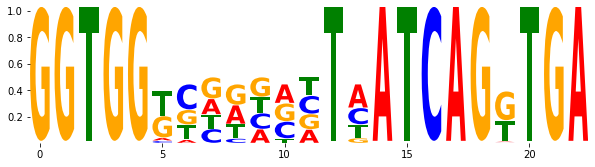

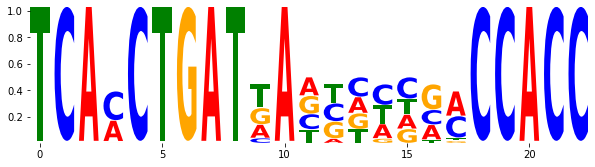

In [17]:
probabilitiesList = []
count = 0
for key in twelveSequenceDict:
    if count == 0:
        probabilitiesList = convert_to_one_hot(key, twelveSequenceDict.get(key))
    else: 
        probabilitiesList = probabilitiesList + convert_to_one_hot(key, twelveSequenceDict.get(key))
    count = count + 1


probabilitiesList = normalize(probabilitiesList, axis=1, norm='l1')

logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(probabilitiesList),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)


probabilitiesList = np.flip(probabilitiesList)
logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(probabilitiesList),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)

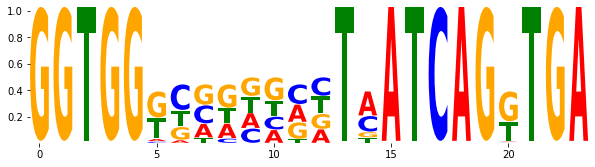

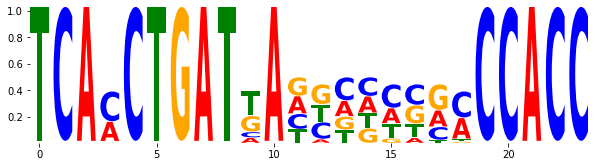

In [18]:

probabilitiesListPosThirteen = []
count = 0
for key in posThirteenSequence:
    if count == 0:
        probabilitiesListPosThirteen = convert_to_one_hot(key, posThirteenSequence.get(key))
    else: 
        probabilitiesListPosThirteen = probabilitiesListPosThirteen + convert_to_one_hot(key, posThirteenSequence.get(key))
    count = count + 1


probabilitiesListPosThirteen = normalize(probabilitiesListPosThirteen, axis=1, norm='l1')

logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(probabilitiesListPosThirteen),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)

probabilitiesListPosThirteen = np.flip(probabilitiesListPosThirteen)
logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(probabilitiesListPosThirteen),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)

[[   0.    0.    0. 1892.]
 [ 924.  457.  171.  340.]
 [1892.    0.    0.    0.]
 [   0.    0.    0. 1892.]
 [   0. 1892.    0.    0.]
 [1892.    0.    0.    0.]
 [   0.    0. 1892.    0.]
 [   6.    0. 1131.  755.]
 [   0.    0.    0. 1892.]
 [   0.    0. 1892.    0.]
 [1892.    0.    0.    0.]
 [1023.  282.  272.  315.]
 [   0.    0. 1892.    0.]
 [   0.    0. 1892.    0.]
 [   0.    0.    0. 1892.]
 [   0.    0. 1892.    0.]
 [   0.    0. 1892.    0.]
 [ 485.  283.  580.  544.]
 [ 439.  328.  637.  488.]
 [ 464.  288.  618.  445.]
 [ 417.  258.  629.  423.]
 [ 373.  268.  594.  378.]
 [ 369.  227.  599.  313.]
 [ 333.  221.  524.  343.]
 [ 300.  244.  451.  310.]
 [ 277.  209.  450.  275.]
 [ 243.  182.  441.  256.]
 [ 257.  159.  366.  233.]
 [ 216.  172.  345.  207.]
 [ 192.  143.  340.  203.]
 [ 179.  114.  301.  177.]
 [ 146.  107.  290.  165.]
 [ 138.  102.  262.  151.]
 [ 121.  100.  225.  124.]
 [ 109.   83.  198.  124.]
 [ 119.   75.  193.   87.]
 [  86.   64.  168.  103.]
 

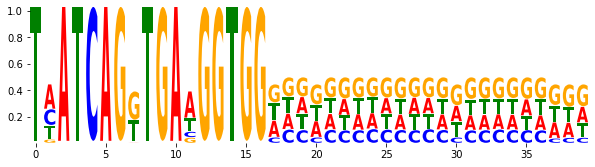

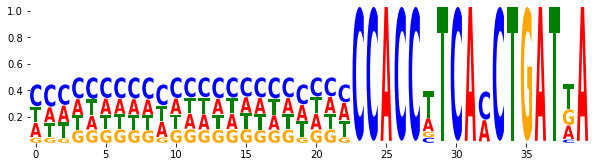

In [19]:
 
rows, cols = (40, 4) 
negProbabilitiesFullList = [[0]*cols]*rows

count = 0
for key in negThirteenSequenceFull:
    one_hot_result = convert_to_one_hot(key, negThirteenSequenceFull.get(key))
    if len(one_hot_result) != 40:
        rows, cols = (40 - len(one_hot_result), 4)
        extra = np.asarray([[0]*cols]*rows)
        one_hot_result = np.vstack((one_hot_result, extra))  
    negProbabilitiesFullList = negProbabilitiesFullList + one_hot_result
    count = count + 1

    
negProbabilitiesFullList = normalize(negProbabilitiesFullList, axis=1, norm='l1')

logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(negProbabilitiesFullList),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)


negProbabilitiesFullList = np.flip(negProbabilitiesFullList)
logo_logo = logo.Logo(getSpecialEncoding(pd.DataFrame(np.asarray(negProbabilitiesFullList),
                columns=['A', 'C', 'G', 'T'])), color_scheme={'A': 'red','C': 'blue', 'G': 'orange', 'T': 'green'},baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.80)